In [1]:
import lightcurves
import optical
import matplotlib.pyplot as mp
import numpy as np
import coordinates
import variables
%matplotlib inline


In [3]:
optical_folder = '/Volumes/Annie/CRRP/OpticalCatalogs/'
#target = 'NGC3201'
#folder = '/Users/jrneeley/CRRP/'+target+'/'
#cluster_ra = '10:17:36.82'
#cluster_dec = '-46:24:44.9'
target = 'NGC7078'
folder = '/Volumes/Annie/CRRP/'+target+'/'
cluster_ra = '21:29:58.33'
cluster_dec = '12:10:01.2'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)



In [4]:
optical_folder = '/Volumes/Annie/CRRP/OpticalCatalogs/'
target = 'NGC7078'
folder = '/Volumes/Annie/CRRP/'+target+'/'
cluster_ra = '21:29:58.33'
cluster_dec = '12:10:01.2'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)

In [6]:
optical.find_variables_fnl(optical_folder, target, center_ra, center_dec, folder=folder)

Reading optical catalog for NGC7078...
Reading optical catalog for NGC7078...
Finished reading optical catalog.


In [8]:
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_folder, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

datasets = optical.compile_datasets(folder, old=0, returnColors=False)

Reading optical catalog for NGC7078...
Finished reading optical catalog.


Datasets:

      jura 101058 2001-07-13 2001-07-20 k
     Y1005  24147 2010-05-07 2010-05-09 r
    lcogt5  11640 2013-10-27 2013-12-10 b
     M1010   8302 2010-10-25 2010-10-25 g
     int11   5377 2011-08-20 2011-08-22 m
      cf86   5231 1986-07-28 1986-07-31 c
      dahl   4717 2014-06-09 2014-08-10 xkcd:brown
     hrcam   4012 1988-06-30 1989-09-08 xkcd:coral
       pac   3388 1990-06-26 1990-06-26 xkcd:purple
    bond10   2804 1997-09-20 1997-09-23 xkcd:maroon
     mzocc   2754 2000-07-27 2000-07-27 xkcd:olive
   int1208   2348 2012-08-14 2012-08-15 xkcd:tan
   int1605   2251 2016-05-29 2016-05-31 xkcd:grey
     bond8   1734 1996-09-21 1996-09-21 xkcd:teal
     int98   1098 1998-08-21 1998-08-21 xkcd:tomato
       arg    969 1997-06-02 1997-06-02 xkcd:orchid
     wfi16    752 2000-08-04 2000-08-04 xkcd:goldenrod
       dmd    628 1998-06-25 1998-06-25 xkcd:orange
    soar10    620 2010-07-14 2010-07-15 xkcd:

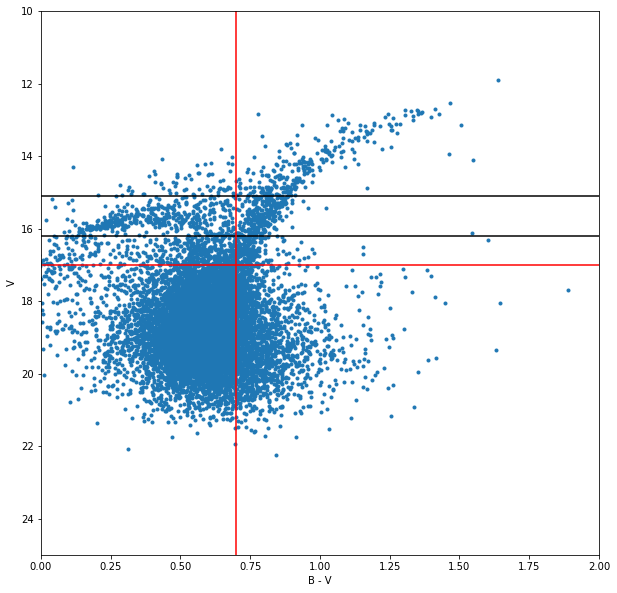

In [18]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 16.2
HB_upper = 15.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.7
GB_lower = 17
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

136 candidate RRL stars.
42 candidate variables on GB.
25 other candidate variables.


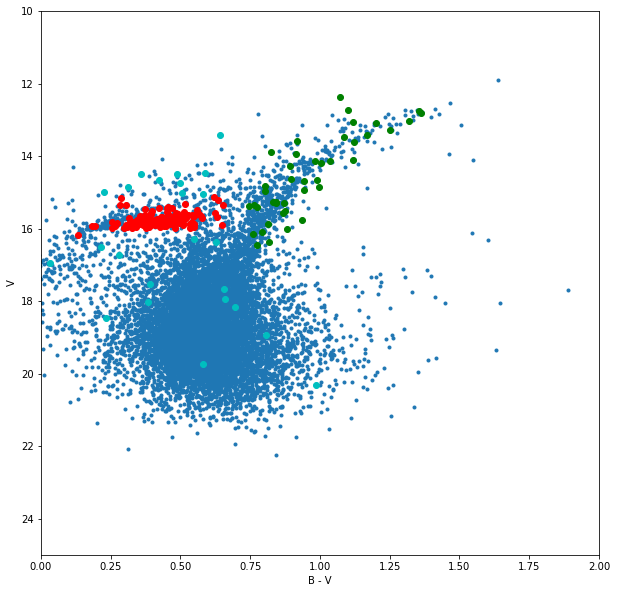

In [19]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [36]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

0 V105 ['21:29:32.99'] ['11:57:42.7']
1 V156 ['21:29:39.4'] ['12:11:43.5']
2 V1 ['21:29:50.18'] ['12:10:26.4']
3 V158 ['21:29:52.23'] ['12:6:11.2']
4 NV1 ['21:29:53.9'] ['12:11:13.2']
5 V34 ['21:29:54.51'] ['12:9:7.1']
6 V108 ['21:29:56.24'] ['12:9:8.3']
7 ZK68 ['21:29:57.06'] ['12:10:2.4']
8 CV2 ['21:29:57.32'] ['12:10:43.3']
9 ZK62 ['21:29:57.78'] ['12:9:53.8']
10 V131 ['21:29:57.85'] ['12:10:0.3']
11 V148 ['21:29:58.04'] ['12:10:2.0']
12 A48219 ['21:29:58.2'] ['12:11:42.5']
13 V137 ['21:29:58.27'] ['12:10:5.2']
14 V125 ['21:29:58.28'] ['12:10:2.4']
15 V152 ['21:29:58.38'] ['12:10:11.9']
16 NV4 ['21:29:58.56'] ['12:9:2.0']
17 V142 ['21:29:58.58'] ['12:10:0.5']
18 V144 ['21:29:59.28'] ['12:10:1.0']
19 A52577 ['21:29:59.84'] ['12:9:39.1']
20 V91 ['21:30:2.87'] ['12:10:30.7']
21 NV9 ['21:30:2.91'] ['12:10:9.1']
22 V122 ['21:30:15.87'] ['12:10:26.8']
23 V157 ['21:30:21.02'] ['12:9:9.3']
24 A84146 ['21:30:25.54'] ['12:7:12.3']


In [73]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

A84146


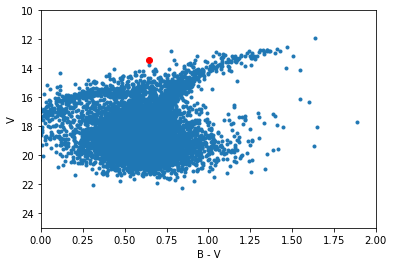

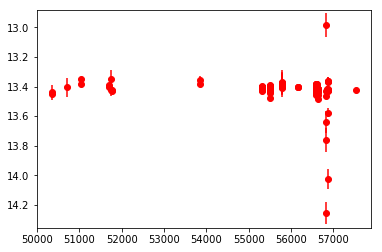

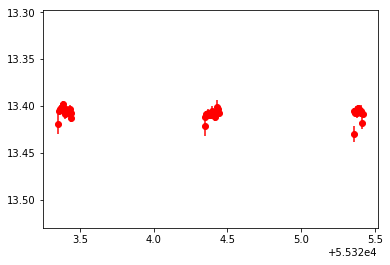

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 148 but corresponding boolean dimension is 44


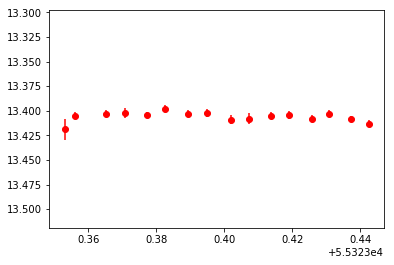

In [74]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)


[ 0.13115974  0.25666572]


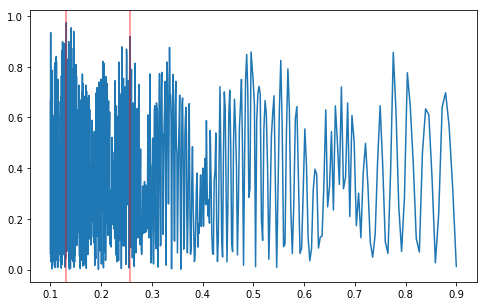

In [71]:
#candidate_periods = variables.candidate_variables(V, lcv_name, min_period=1.0, max_period=20., grid_num=1000)
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)
#candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.01, max_period=0.09, grid_num=1000)




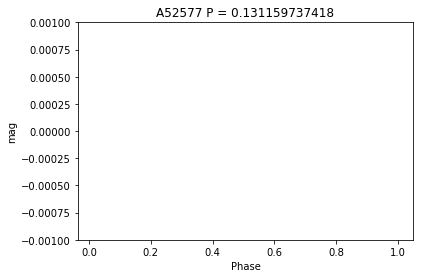

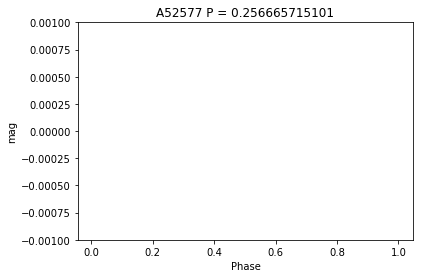

In [72]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)

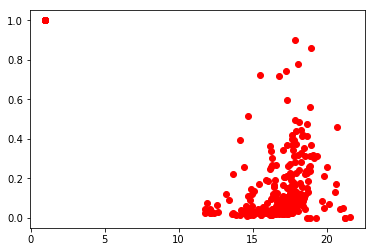

In [122]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')

for ind, lcv in enumerate(data['id']):
    lcv_name = data['id'][ind]
    lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    
        # remove data with large error bars
        error_threshold = 0.05
    #    color_var = np.mean(B[0][V[1] < error_threshold]) - np.mean(V[0][V[1] < error_threshold])
        mag_var = np.mean(V[0][V[1] < error_threshold])
        std = np.std(V[0][V[1] < error_threshold])
    
        mp.plot(mag_var, std, 'ro')
    except:
        continue
    # remove data with large error bars
   # error_threshold = 0.05
   # V[0][V[1] > error_threshold] = np.nan
   # V[1][V[1] > error_threshold] = np.nan
mp.show()

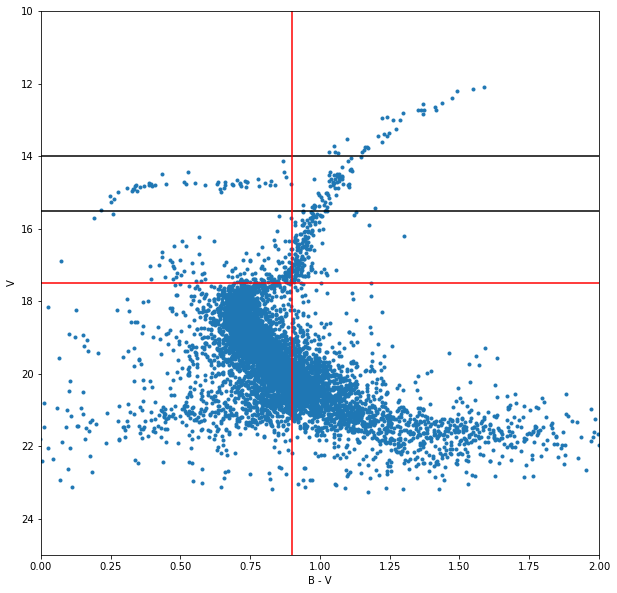

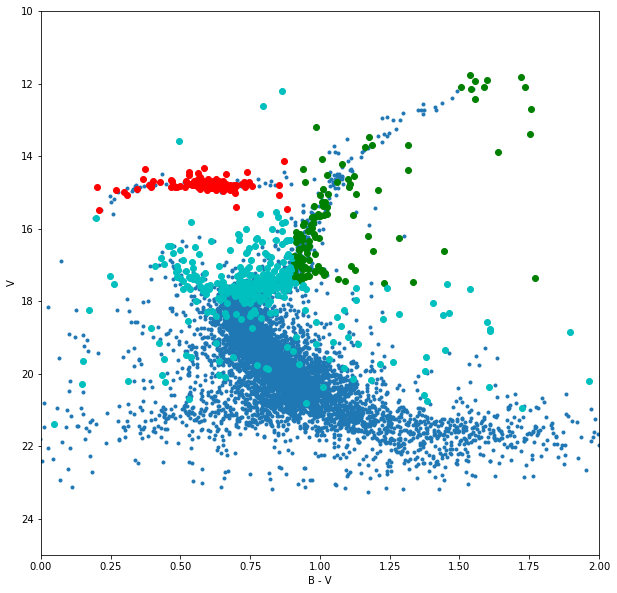

In [30]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= 15.5 and mag_var >= 14 and color_var <= 0.9):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= 17.5 and color_var >= 0.9):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

    
    
